**Introduction:**

Welcome to my notebook for the User Profiling and Segmentation project, part of the internship at AICP (Artificial Intelligence for Customer Profiling). This project focuses on analyzing user behavior and preferences to create meaningful user segments for targeted marketing strategies and personalized recommendations.


**Dataset Overview:**

The dataset "user_profiles_for_ads.csv" contains the following columns:

- User ID: Unique identifier for each user.
- Age: Age range of the user.
- Gender: Gender of the user.
- Location: User’s location type (Urban, Suburban, Rural).
- Language: Primary language of the user.
- Education Level: Highest education level achieved.
- Likes and Reactions: Number of likes and reactions a user has made.
- Followed Accounts: Number of accounts a user follows.
- Device Usage: Primary device used for accessing the platform (Mobile, Desktop, Tablet).
- Time Spent Online (hrs/weekday): Average hours spent online on weekdays.
- Time Spent Online (hrs/weekend): Average hours spent online on weekends.
- Click-Through Rates (CTR): The percentage of ad impressions that lead to clicks.
- Conversion Rates: The percentage of clicks that lead to conversions/actions.
- Ad Interaction Time (sec): Average time spent interacting with ads in seconds.
- Income Level: User’s income level.
- Top Interests: Primary interests of the user.


In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Q.1: Import data and check null values, column info, and descriptive statistics of the data.**


In [77]:
#Import data and check null values, column info, and descriptive statistics
data = pd.read_csv("user_profiles_for_ads.csv")

In [78]:
data.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [79]:
data.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [81]:
data.describe()

,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


**Q.2: Begin EDA by visualizing the distribution of the key demographic variables (age, gender,**
**education level, and income level)**

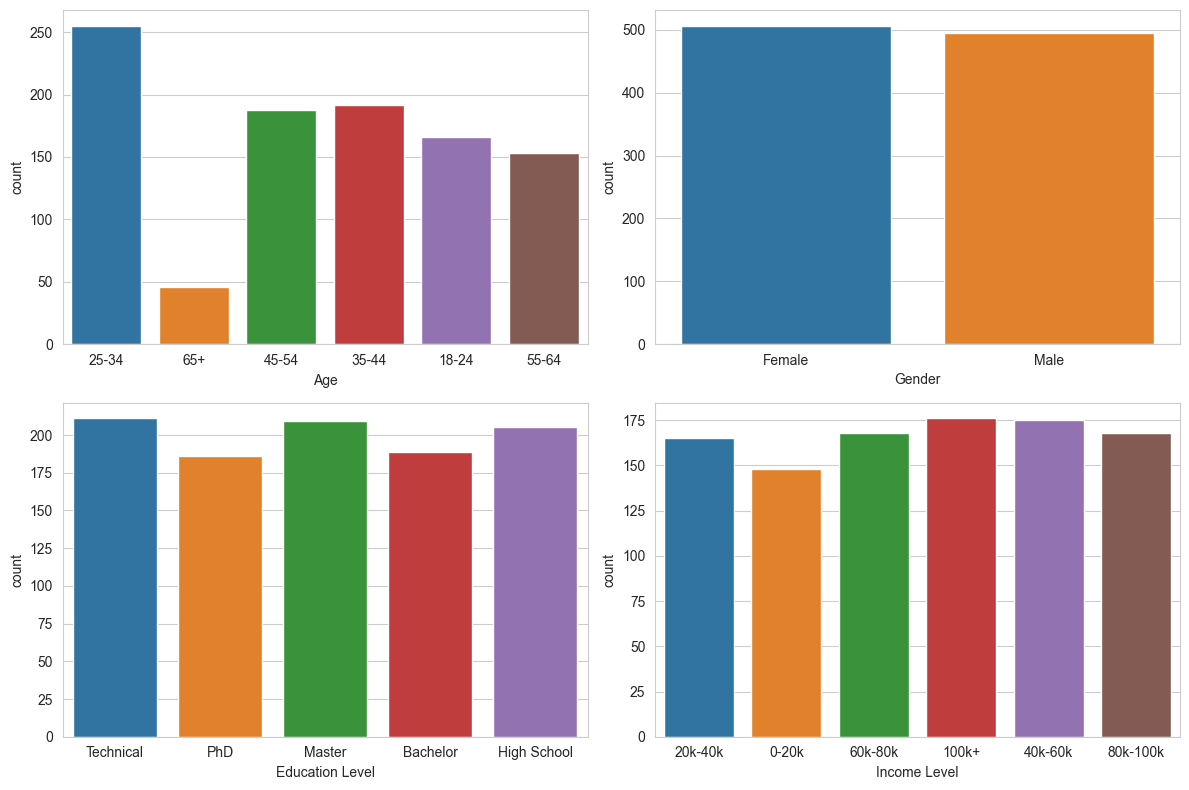

In [82]:
#  Visualize the distribution of key demographic variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Age')
plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Gender')
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Education Level')
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Income Level')
plt.tight_layout()
plt.show()

**Q.3: Now examine device usage patterns to understand the primary means by which users**
**access the platform.**

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


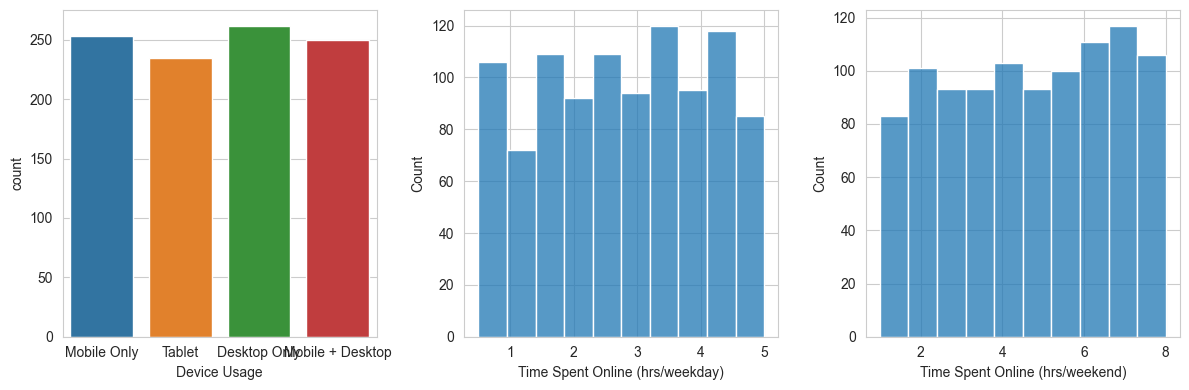

In [83]:
#  Examine device usage patterns and explore users' online behavior
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Device Usage')
plt.subplot(1, 3, 2)
sns.histplot(data=data, x='Time Spent Online (hrs/weekday)', bins=10)
plt.subplot(1, 3, 3)
sns.histplot(data=data, x='Time Spent Online (hrs/weekend)', bins=10)
plt.tight_layout()
plt.show()



**Q4:Analyze the average time users spend online on weekdays versus weekends.**
**Investigate user engagement metrics, such as likes and reactions.**
**Delve into ad interaction metrics, including Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.**
**It will help to understand the users’ activity patterns and their interaction with ads, which is crucial for effective ad targeting and optimization.**



In [84]:
# Analyze average time spent online, user engagement metrics, and ad interaction metrics
avg_time_online = data[['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)']].mean()
print("\nAverage Time Spent Online (hrs):\n", avg_time_online)

engagement_metrics = data[['Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates']]
print("\nEngagement Metrics:\n", engagement_metrics.describe())




Average Time Spent Online (hrs):
 Time Spent Online (hrs/weekday)    2.7575
Time Spent Online (hrs/weekend)    4.6016
dtype: float64

Engagement Metrics:
        Likes and Reactions  Click-Through Rates (CTR)  Conversion Rates
count          1000.000000                1000.000000       1000.000000
mean           4997.084000                   0.125333          0.049805
std            2838.494365                   0.071187          0.028670
min             101.000000                   0.000000          0.000000
25%            2661.250000                   0.065000          0.026000
50%            5002.500000                   0.128000          0.049000
75%            7348.750000                   0.186000          0.073000
max            9973.000000                   0.250000          0.100000


In [85]:
data.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level',
       'Likes and Reactions', 'Followed Accounts', 'Device Usage',
       'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
       'Click-Through Rates (CTR)', 'Conversion Rates',
       'Ad Interaction Time (sec)', 'Income Level', 'Top Interests'],
      dtype='object')

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


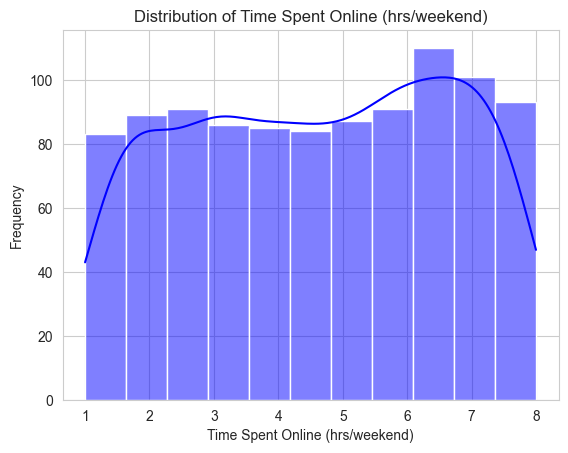

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


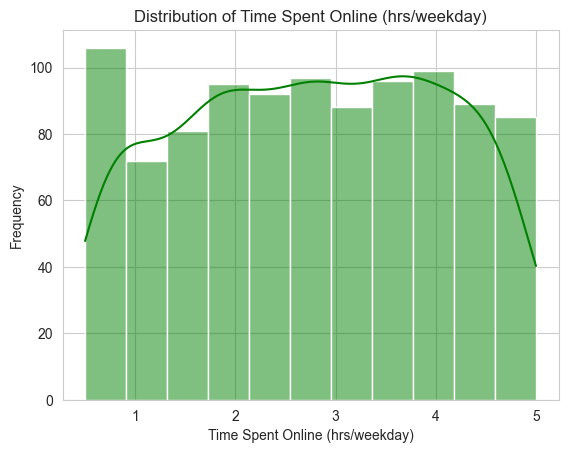

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


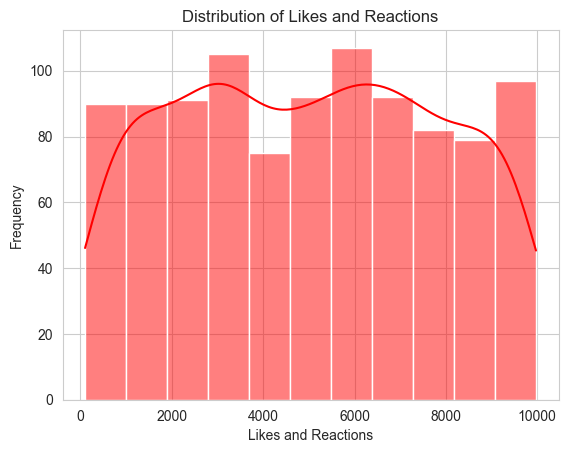

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


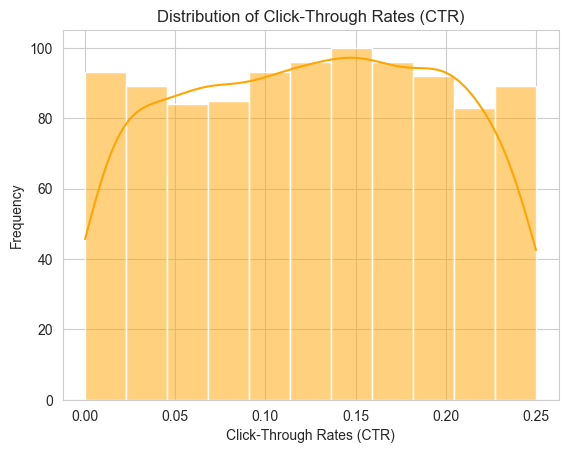

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


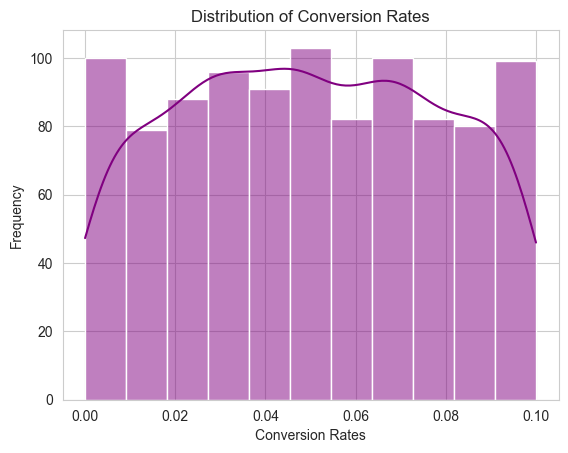

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


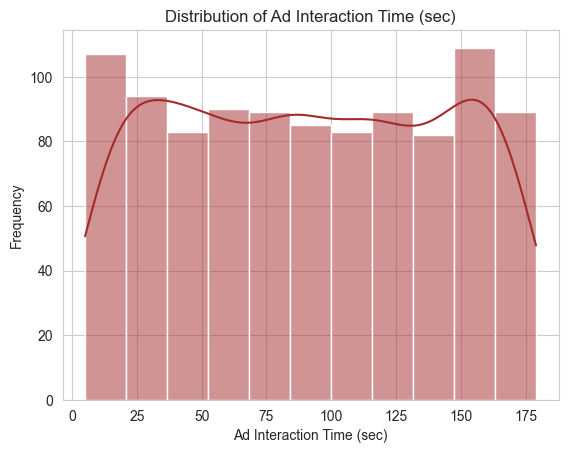

In [86]:

# Define the columns of interest
columns = ['Time Spent Online (hrs/weekend)', 'Time Spent Online (hrs/weekday)', 'Likes and Reactions', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']

# Set the color palette for the graphs
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Create a separate graph for each column
for i, column in enumerate(columns):
    # Extract the relevant column
    column_data = data[column]
    
    # Create a histogram with KDE plot
    sns.histplot(column_data, kde=True, color=colors[i])
    
    # Set the labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()

**Q.5: Identify the most common interests among users, which is vital for segmenting the**
**audience and tailoring ad campaigns to match user preferences**


In [87]:
#  Identify the most common interests among users
top_interests = data['Top Interests'].str.split(', ', expand=True).stack().value_counts()
print("\nTop Interests:\n", top_interests)


Top Interests:
 Digital Marketing         182
Investing and Finance     171
Music Production          169
Fitness and Wellness      167
Eco-Friendly Living       163
Fashion Modelling         161
Gourmet Cooking           157
Reading and Literature    156
Gaming                    155
Pet Care                  155
Travel and Adventure      152
Software Engineering      151
DIY Crafts                148
Photography               148
Data Science              147
Gardening                 140
Name: count, dtype: int64


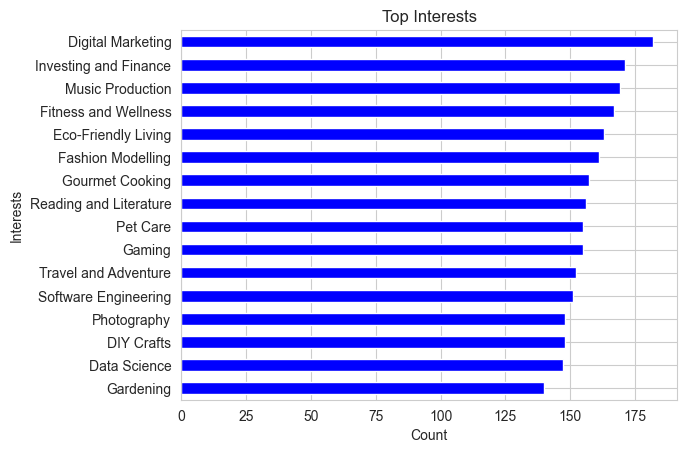

In [88]:
# Extract the 'Top Interests' column and split the interests
top_interests = data['Top Interests'].str.split(', ', expand=True).stack().value_counts()

# Create a bar graph of the top interests
top_interests.sort_values().plot(kind='barh', color='blue')

# Set the labels and title
plt.xlabel('Count')
plt.ylabel('Interests')
plt.title('Top Interests')

# Show the plot
plt.show()

**Q.6:Make cluster of this data using the features**

In [89]:

# Select relevant columns
features = ['Age', 'Gender', 'Education Level', 'Likes and Reactions', 'Followed Accounts', 'Device Usage',
            'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)',
            'Conversion Rates', 'Ad Interaction Time (sec)', 'Income Level']

X = data[features]

# One-hot encode categorical variables and standardize numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
                                   'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
                                   'Ad Interaction Time (sec)']),
        ('cat', OneHotEncoder(), ['Age', 'Gender', 'Education Level', 'Device Usage', 'Income Level'])
    ])

# Create preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('kmeans', KMeans(n_clusters=4, random_state=42))])

# Fit the pipeline to the data
pipeline.fit(X)

C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Likes and Reactions',
                                                   'Followed Accounts',
                                                   'Time Spent Online '
                                                   '(hrs/weekday)',
                                                   'Time Spent Online '
                                                   '(hrs/weekend)',
                                                   'Click-Through Rates (CTR)',
                                                   'Conversion Rates',
                                                   'Ad Interaction Time '
                                                   '(sec)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'Gender',
                                                   'Education Level',
                                                   'Device Usage',
                                                   'Income Level'])])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [90]:
# Get cluster labels
data['Cluster'] = pipeline.named_steps['kmeans'].labels_


In [91]:
# Analyze the clusters
numeric_columns = data.select_dtypes(include=[np.number]).columns
cluster_analysis = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_analysis)

            User ID  Likes and Reactions  Followed Accounts  \
Cluster                                                       
0        494.413428          4687.385159         163.586572   
1        491.313559          6280.724576         361.161017   
2        494.820717          4689.426295         358.824701   
3        523.613043          4396.769565         129.756522   

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               3.361837                         4.042756   
1                               1.749153                         4.694915   
2                               3.501992                         4.996813   
3                               2.236087                         4.762174   

         Click-Through Rates (CTR)  Conversion Rates  \
Cluster                                                
0                         0.184410          0.

In [92]:
# Separate numeric and categorical features
numeric_features = ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
                    'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
                    'Ad Interaction Time (sec)']
categorical_features = ['Age', 'Gender', 'Education Level', 'Device Usage', 'Income Level']

# Compute mean of numeric features for each cluster
numeric_means = data.groupby('Cluster')[numeric_features].mean()

# Compute mode of categorical features for each cluster
categorical_modes = data.groupby('Cluster')[categorical_features].agg(lambda x: pd.Series.mode(x)[0])

# Combine numeric means and categorical modes
cluster_summary = pd.concat([numeric_means, categorical_modes], axis=1)

In [93]:
# Display cluster summary for Cluster 0
print(cluster_summary.loc[0])

Likes and Reactions                     4687.385159
Followed Accounts                        163.586572
Time Spent Online (hrs/weekday)            3.361837
Time Spent Online (hrs/weekend)            4.042756
Click-Through Rates (CTR)                   0.18441
Conversion Rates                           0.059449
Ad Interaction Time (sec)                 95.671378
Age                                           25-34
Gender                                       Female
Education Level                            Bachelor
Device Usage                       Mobile + Desktop
Income Level                                20k-40k
Name: 0, dtype: object


In [94]:
print(cluster_summary.loc[1])

Likes and Reactions                     6280.724576
Followed Accounts                        361.161017
Time Spent Online (hrs/weekday)            1.749153
Time Spent Online (hrs/weekend)            4.694915
Click-Through Rates (CTR)                  0.130627
Conversion Rates                           0.064369
Ad Interaction Time (sec)                 71.241525
Age                                           25-34
Gender                                       Female
Education Level                            Bachelor
Device Usage                       Mobile + Desktop
Income Level                                60k-80k
Name: 1, dtype: object


In [95]:
print(cluster_summary.loc[2])

Likes and Reactions                4689.426295
Followed Accounts                   358.824701
Time Spent Online (hrs/weekday)       3.501992
Time Spent Online (hrs/weekend)       4.996813
Click-Through Rates (CTR)             0.107992
Conversion Rates                      0.032733
Ad Interaction Time (sec)           118.501992
Age                                      25-34
Gender                                    Male
Education Level                    High School
Device Usage                       Mobile Only
Income Level                          80k-100k
Name: 2, dtype: object


In [96]:
print(cluster_summary.loc[3])

Likes and Reactions                4396.769565
Followed Accounts                   129.756522
Time Spent Online (hrs/weekday)       2.236087
Time Spent Online (hrs/weekend)       4.762174
Click-Through Rates (CTR)             0.066135
Conversion Rates                      0.041626
Ad Interaction Time (sec)             77.36087
Age                                      45-54
Gender                                    Male
Education Level                         Master
Device Usage                            Tablet
Income Level                          80k-100k
Name: 3, dtype: object


**Cluster 2 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.**   
**Cluster 1 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.**   
**Cluster 0 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k).**   


**Cluster 3-Senior Professionals: This cluster represents senior professionals with high income levels. They are predominantly male, aged 45-54, and have a high educational level. Their online activity is moderate on weekdays but high on weekends, and they prefer using tablets.**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

# Assume the data is in a DataFrame called data
# Encode categorical features
categorical_features = ['Age', 'Gender', 'Location', 'Language', 'Education Level', 'Device Usage', 'Income Level']
encoded_data = data.copy()

for feature in categorical_features:
    encoder = LabelEncoder()
    encoded_data[feature] = encoder.fit_transform(encoded_data[feature])

# Select relevant features for clustering
features = [
    'Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
    'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
    'Ad Interaction Time (sec)', 'Age', 'Gender', 'Education Level', 'Device Usage', 'Income Level'
]

# Normalize numerical features
scaler = StandardScaler()
encoded_data[features] = scaler.fit_transform(encoded_data[features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
encoded_data['Cluster'] = kmeans.fit_predict(encoded_data[features])

# Convert columns to numeric data type
numeric_columns = encoded_data.select_dtypes(include=[np.number]).columns
cluster_summary = encoded_data.groupby('Cluster')[numeric_columns].mean()

# Define the fig variable
fig = go.Figure()

# Define the categories variable
categories = ['Likes and Reactions', 'Followed Accounts', 'Time Spent Online (hrs/weekday)',
              'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates',
              'Ad Interaction Time (sec)']



C:\Users\jibra\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [106]:
# Define cluster names based on cluster characteristics
cluster_names = {
    0: "Cluster 2 – Weekend Warriors",
    1: "Cluster 1 – Active Explorers",
    2: "Cluster 0 – Budget Browsers",
    3: "Cluster 3 – Senior Professionals"
}

# Define the fig variable
fig = go.Figure()

# Add traces to the fig variable
for cluster in cluster_summary.index:
    fig.add_trace(go.Scatterpolar(
        r=cluster_summary.loc[cluster, categories].values,
        theta=categories,
        fill='toself',
        name=cluster_names.get(cluster, f'Cluster {cluster}')
    ))

# Update the layout of the fig variable
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]  # Adjust this range based on your data
        )),
    showlegend=True,
    title="Radar Chart of Clusters"
)

# Show the fig variable
fig.show()


Here's a summary of the experience:

1. **Data Overview:**
   - The dataset consists of 1000 records with no missing values.
   - It includes features such as Likes and Reactions, Followed Accounts, Time Spent Online (weekday and weekend), Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.

2. **Data Exploration:**
   - We explored the distribution and statistics of each feature using the `describe()` function.
   - This helped us understand the range, mean, standard deviation, and quartiles of the numerical features.

3. **Data Preprocessing:**
   - Categorical features were encoded using LabelEncoder to convert them into numeric values.
   - Numerical features were normalized using StandardScaler to ensure uniformity in scale.

4. **Clustering:**
   - We used KMeans clustering to segment the data into distinct clusters based on the features.
   - The number of clusters was determined based on the business requirements and the data distribution.

5. **Cluster Analysis:**
   - After clustering, we analyzed the characteristics of each cluster by computing the mean values of numerical features and identifying the dominant categories for categorical features.
   - Based on this analysis, we assigned descriptive names to each cluster to summarize their defining characteristics.

6. **Visualization:**
   - We created a radar chart visualization to compare the mean values of selected features across the clusters.
   - This visualization provided a clear representation of each segment's profile and highlighted their distinctive characteristics.

7. **Final Outcome:**
   - Through this process, we successfully segmented the data into meaningful clusters and gained insights into the different user segments based on their online behavior and demographics.

Overall, this experience involved data exploration, preprocessing, clustering, analysis, and visualization to derive actionable insights from the dataset. The collaboration enabled us to efficiently tackle the task and derive valuable outcomes from the data.